In [247]:
import re
import os
import sys
import datetime
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.tsa.api as smt

from matplotlib.pylab import rcParams
plt.rcParams['savefig.dpi'] = 250
plt.rcParams['figure.figsize'] = (18, 5)
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import autocorrelation_plot

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats as scs
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime

from math import sqrt
from sklearn.metrics import mean_squared_error

from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

from sklearn.model_selection import TimeSeriesSplit
from scipy.optimize import minimize 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

#### Visualizar la demanda como serie de tiempo

In [248]:
#serie de tiempo en grafico
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

#leer la data del excel de los huespedes.csv
demand_data = pd.read_csv('./data/DemandaInfo.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

#guardar en otra variable
demand_ts = demand_data['demand']

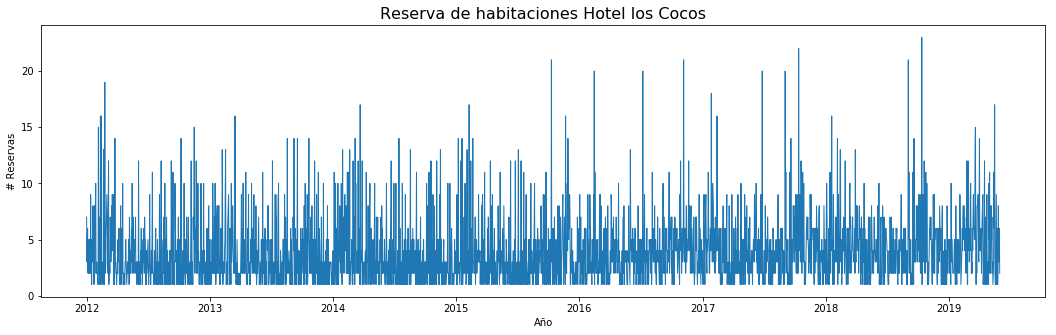

In [249]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [250]:
demand_ts

time
2012-01-01    7
2012-01-02    3
2012-01-03    5
2012-01-04    6
2012-01-05    2
2012-01-06    3
2012-01-07    2
2012-01-08    5
             ..
2019-05-24    3
2019-05-25    1
2019-05-26    2
2019-05-27    8
2019-05-28    3
2019-05-29    4
2019-05-30    6
2019-05-31    2
Name: demand, Length: 2706, dtype: int64

In [251]:
#Dividir datos de prueba y entrenamiento
train = demand_ts[:'2018']
test = demand_ts['2019':]

print(len(train))
print(len(test))

2555
151


In [252]:
#y_test

#### Holt-Winters’ Method

In [7]:
fit1 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)

fit2 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True)

In [ ]:
fit3 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

fit4 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

In [ ]:
fit5 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='add').fit(use_boxcox=True)

fit6 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='mul').fit(use_boxcox=True)

print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

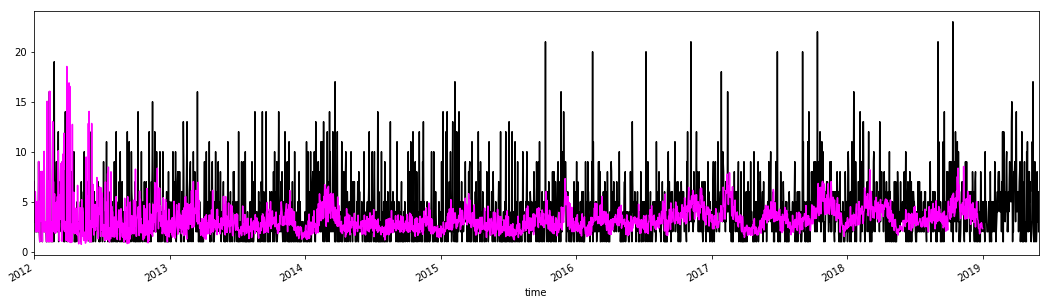

In [12]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#it1 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(color='magenta')
#fit1.forecast(48).plot(color='blue', legend=True)
plt.show()

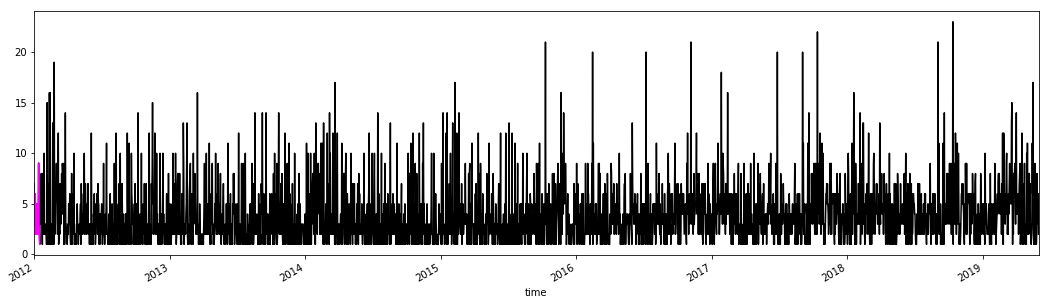

In [30]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit2 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.fittedvalues.plot(color='magenta')
#fit2.forecast(48).plot(color='blue', legend=True)
plt.show()

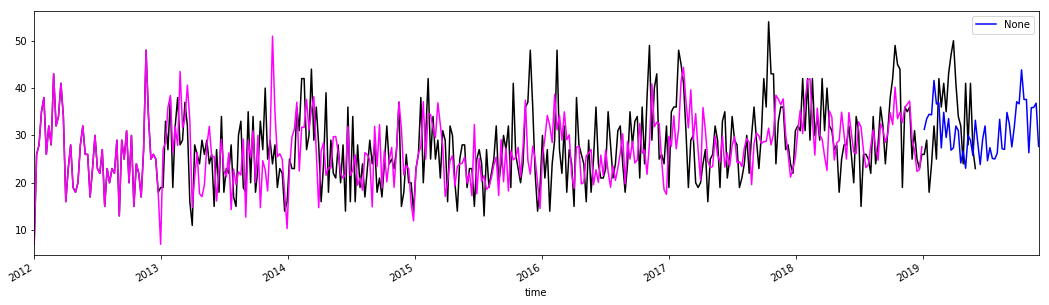

In [117]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit3 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit3.fittedvalues.plot(color='magenta')
fit3.forecast(48).plot(color='blue', legend=True)
plt.show()

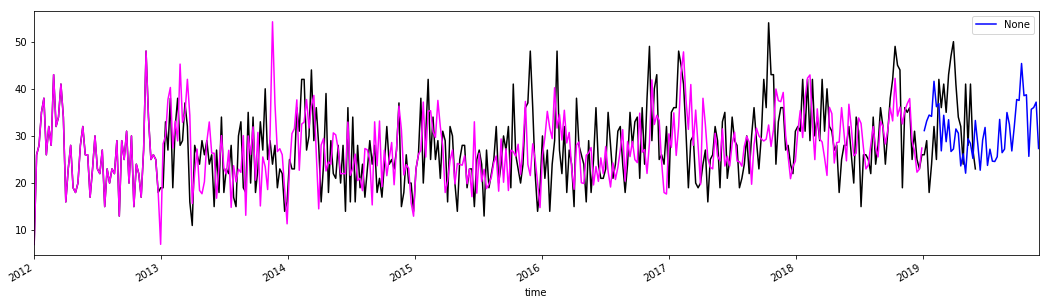

In [118]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit4 = ExponentialSmoothing(demand_ts, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit4.fittedvalues.plot(color='magenta')
fit4.forecast(48).plot(color='blue', legend=True)
plt.show()

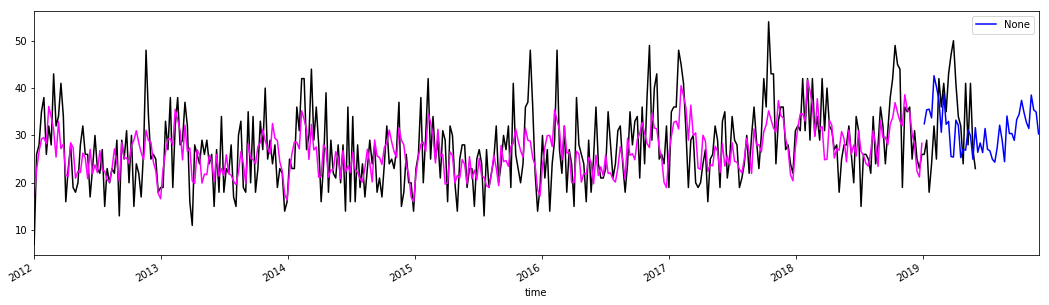

In [119]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit5 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='add').fit(use_boxcox=True))
fit5.fittedvalues.plot(color='magenta')
fit5.forecast(48).plot(color='blue', legend=True)
plt.show()

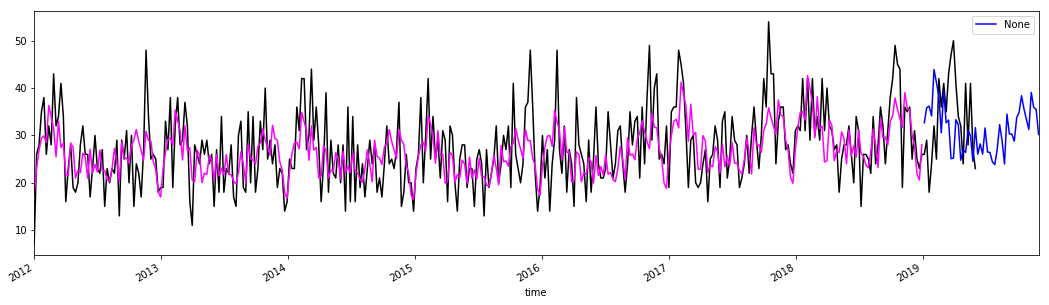

In [120]:
#original
plt.plot(demand_ts, linewidth=1.5, color='black', label='Original')

#fit6 = ExponentialSmoothing(demand_ts, seasonal_periods=52, seasonal='mul').fit(use_boxcox=True)
fit6.fittedvalues.plot(color='magenta')
fit6.forecast(48).plot(color='blue', legend=True)
plt.show()

In [24]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

initial_trend(train, 52)

-0.0018491124260354996

In [25]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

initial_seasonal_components(train, 52)

{0: 0.393249607535322,
 1: -0.1169544740973313,
 2: 0.2299843014128727,
 3: 0.2299843014128727,
 4: -0.5659340659340656,
 5: 0.06671899529042373,
 6: -0.2802197802197803,
 7: 0.5565149136577707,
 8: -0.11695447409733124,
 9: 0.20957613814756687,
 10: -0.6271585557299842,
 11: -0.2394034536891681,
 12: 0.556514913657771,
 13: -0.4434850863422289,
 14: -0.2598116169544741,
 15: 0.4748822605965463,
 16: -0.25981161695447413,
 17: 0.37284144427001586,
 18: -0.014913657770800684,
 19: 0.06671899529042385,
 20: 0.3524332810047096,
 21: 0.1687598116169544,
 22: -0.2802197802197803,
 23: 0.617739403453689,
 24: -0.21899529042386198,
 25: 0.5156985871271585,
 26: 0.20957613814756687,
 27: 0.025902668759811596,
 28: -0.07613814756671904,
 29: 0.33202511773940346,
 30: 0.9850863422291992,
 31: -0.014913657770800665,
 32: -0.3006279434850862,
 33: -0.6067503924646782,
 34: -0.2802197802197802,
 35: 0.18916797488226053,
 36: -0.21899529042386176,
 37: 0.14835164835164832,
 38: -0.5251177394034536,


In [253]:
futureDates = pd.date_range(start = '2019-01-01', periods=len(test), freq='D')
futureDates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', length=151, freq='D')

In [254]:
y_hat_avg = test.copy()

fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=52 , seasonal='add',).fit(smoothing_level=0.2, 
                                                                                          smoothing_slope=0.7, 
                                                                                          smoothing_seasonal=0.81,
                                                                                          damping_slope=0.26, 
                                                                                          optimized=True, 
                                                                                          use_boxcox=True)

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))


In [255]:
#y_hat_avg['Holt_Winter']

In [256]:
Holt_Winter = pd.DataFrame(y_hat_avg['Holt_Winter'], index=futureDates)
#Holt_Winter

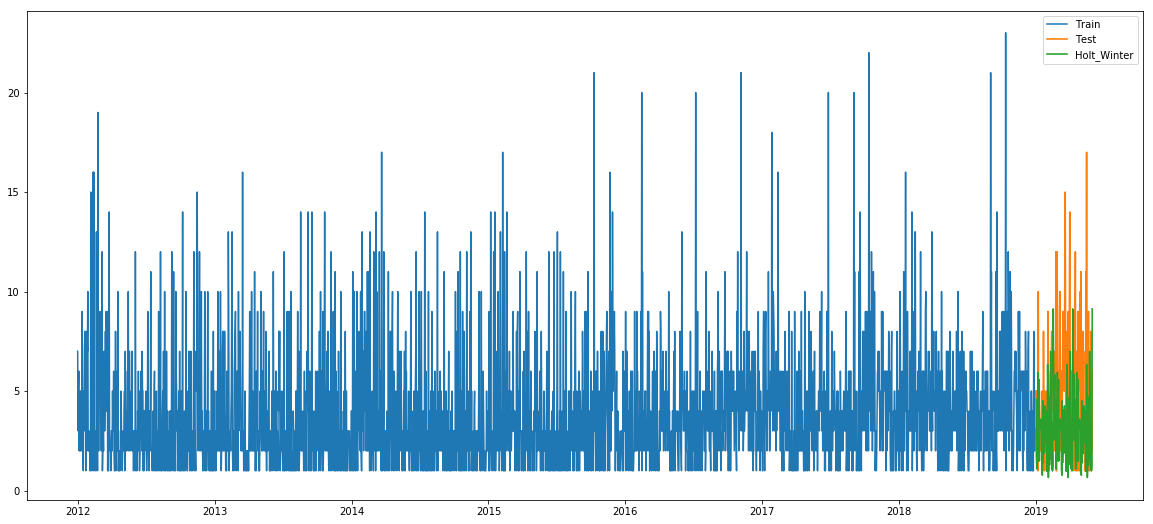

In [257]:
plt.figure(figsize=(20,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test', linewidth=1.6)
plt.plot(Holt_Winter, label='Holt_Winter', linewidth=1.6)

plt.legend(loc='best')
plt.show()

In [258]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [259]:
mean_absolute_percentage_error(test,Holt_Winter )

78.2176354546867

In [260]:
pd.set_option('display.max_columns', 3000)
pd.options.display.max_columns = 1600
pd.options.display.max_rows = 1600

Holt_Winter

,0
2019-01-01,3.08126
2019-01-02,1.76730
2019-01-03,1.08496
2019-01-04,4.59404
2019-01-05,2.69010
2019-01-06,5.94225
2019-01-07,3.49519
2019-01-08,1.48094
2019-01-09,5.57607
2019-01-10,1.49880
